# **Importando a base de dados**

In [ ]:
import pandas as pd


In [ ]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# **Tradução**

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner':'Jantar' , 
     'Lunch': 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# **Importando o Searborn**

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: missingno


# **Análise 1: Valor da conta e gorjeta**

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

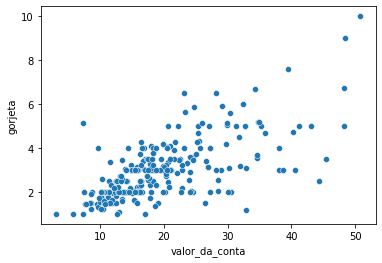

In [ ]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)


 **Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [ ]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\n')
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## **Criando o campo porcentagem**

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


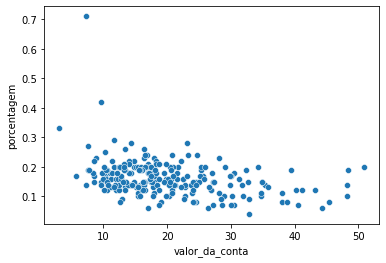

In [ ]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data= gorjetas)



**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

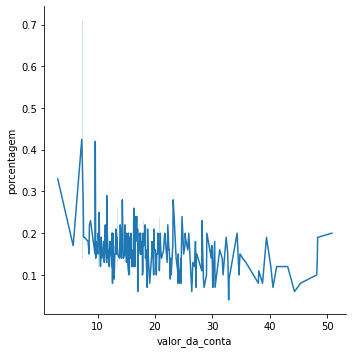

In [ ]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

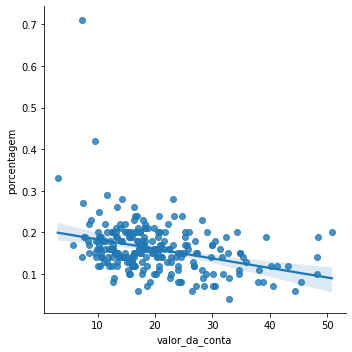

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

### *Para saber mais*

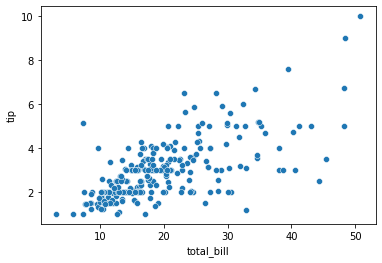

In [ ]:
primeiro_plot = sns.scatterplot(x='total_bill', y='tip', data=dados)

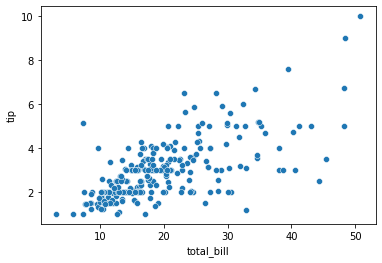

In [ ]:
primeiro_plot.get_figure()

In [ ]:
primeiro_plot.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

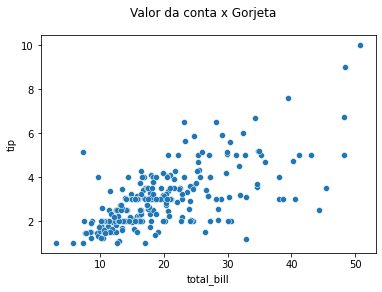

In [ ]:
primeiro_plot.get_figure()

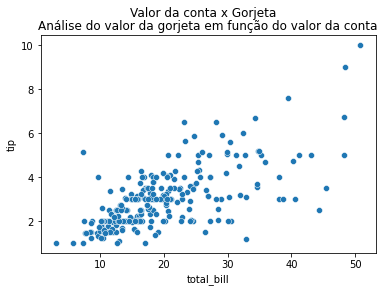

In [ ]:
primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta')
primeiro_plot.get_figure()


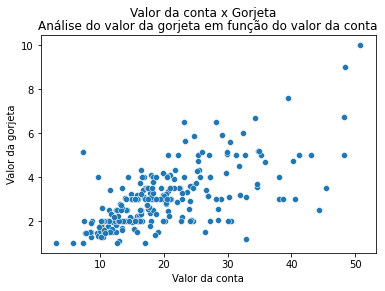

In [ ]:
primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
primeiro_plot.get_figure()

In [ ]:
imagem = primeiro_plot.get_figure()

In [ ]:
imagem.savefig('imagem.png')

# **Análise 2: Sobremesa**

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


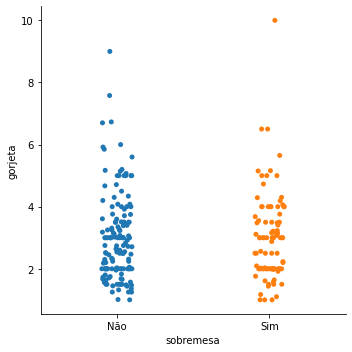

In [ ]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

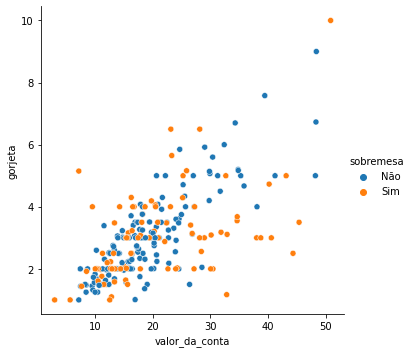

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa',data = gorjetas)

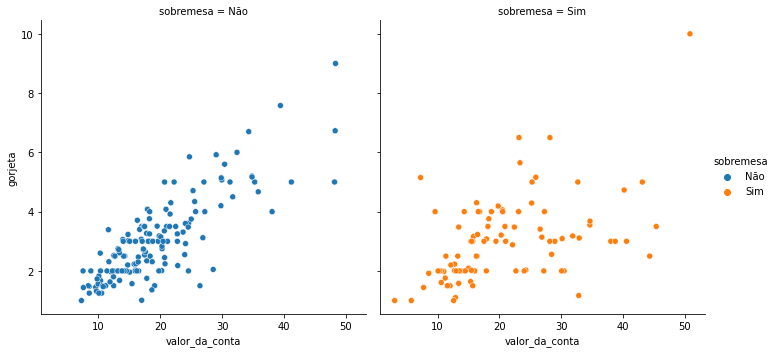

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)


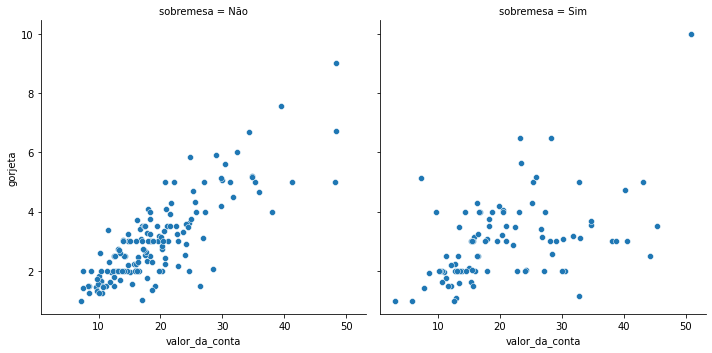

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', data = gorjetas)


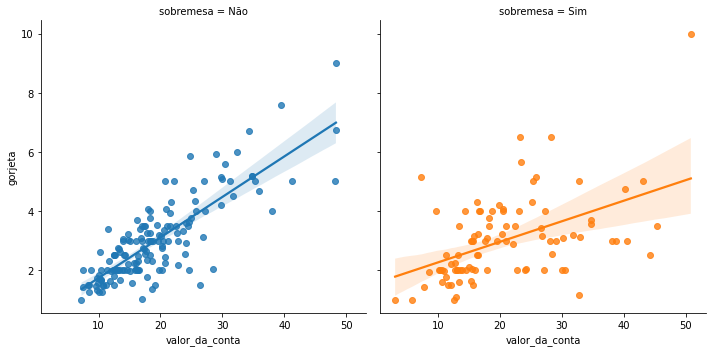

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

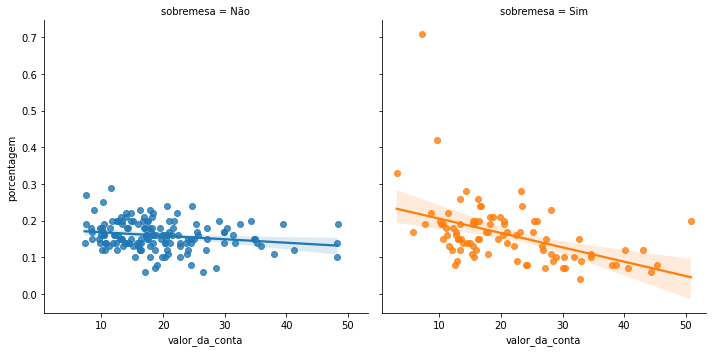

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

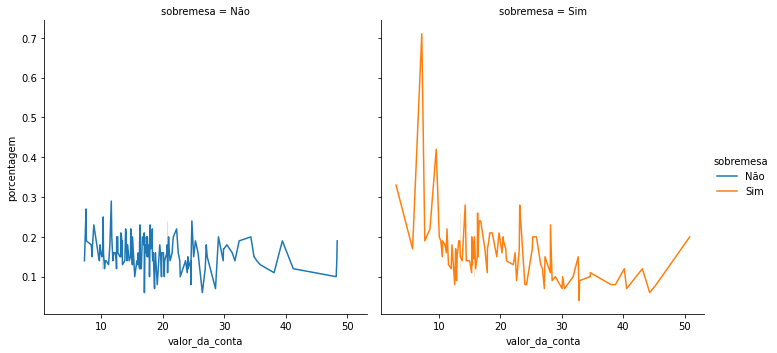

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## **Teste de Hipótese**

**H<sup>null</sup>**
> **A distribuição da taxa na gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa na gorjeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa na gorjeta é a mesma nos dois grupos**

# **Análise 3: Dia da semana**

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

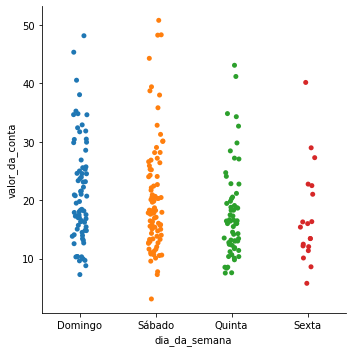

In [ ]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

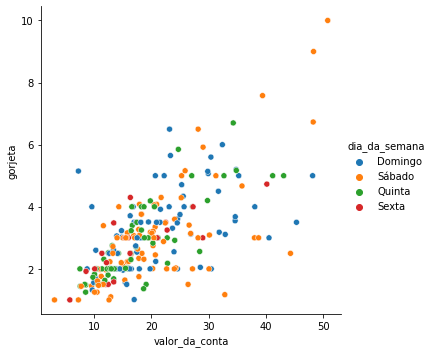

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

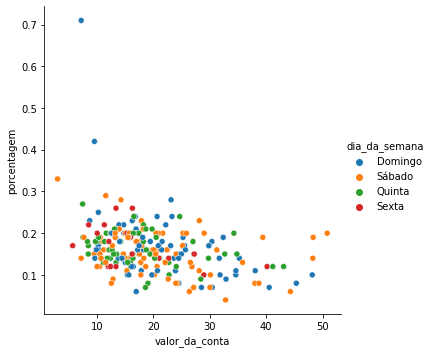

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

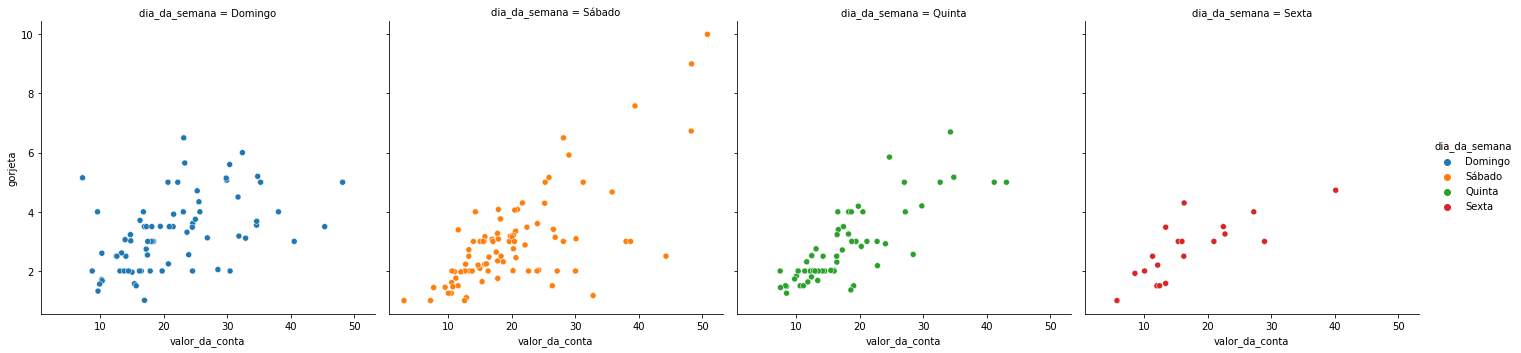

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

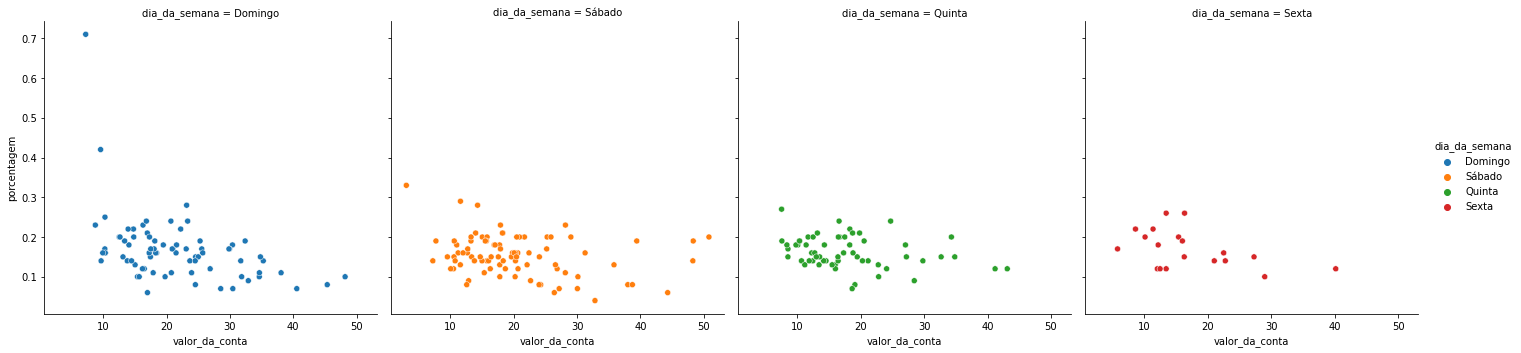

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

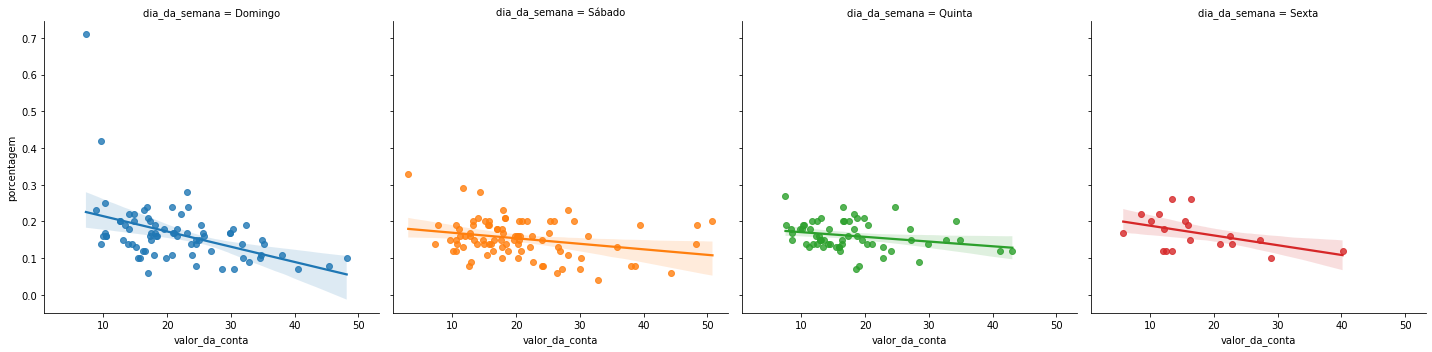

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [ ]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## **Teste de Hipótese**

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**


# **Análise 4: Hora do dia**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

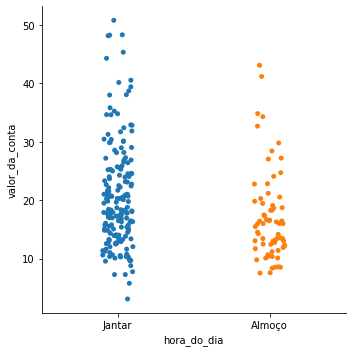

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

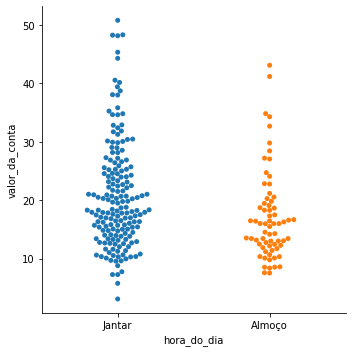

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind = 'swarm', data=gorjetas)

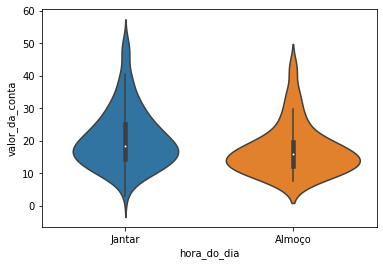

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

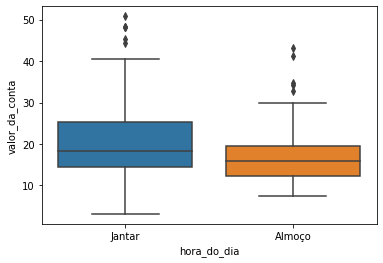

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoço = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


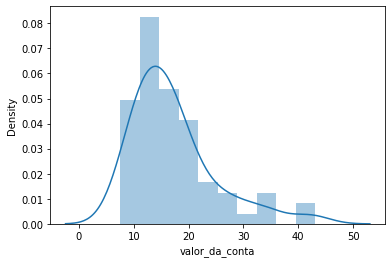

In [ ]:
sns.distplot(almoço)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


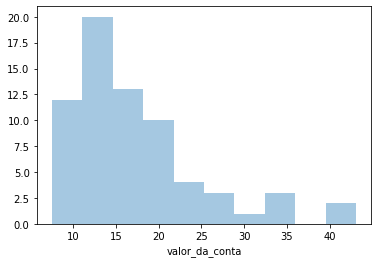

In [ ]:
sns.distplot(almoço, kde = False)

In [ ]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


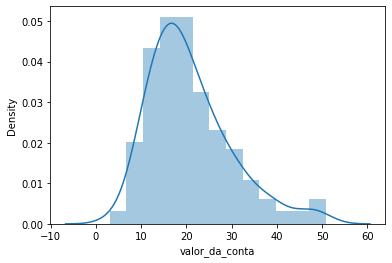

In [ ]:
sns.distplot(jantar)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


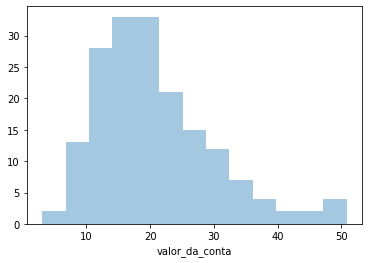

In [ ]:
sns.distplot(jantar, kde = False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


### **Teste de Hipótese**

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [ ]:
r2 = ranksums(almoço, jantar)

In [ ]:

print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

## **Teste de Hipótese 2**

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [ ]:
porcentagem_almoço = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_almoço

77     0.15
78     0.13
79     0.16
80     0.15
81     0.20
       ... 
222    0.22
223    0.19
224    0.12
225    0.15
226    0.20
Name: porcentagem, Length: 68, dtype: float64

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcentagem_jantar 

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
239    0.20
240    0.07
241    0.09
242    0.10
243    0.16
Name: porcentagem, Length: 176, dtype: float64

In [ ]:
r3 = ranksums(porcentagem_almoço, porcentagem_jantar)

In [ ]:
r3 = ranksums(porcentagem_almoço, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e almoço**
